# Question 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mlxtend.data import loadlocal_mnist
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [122]:
xTrain,yTrain=loadlocal_mnist(images_path='./mnist/train-images.idx3-ubyte', labels_path='./mnist/train-labels.idx1-ubyte')
xTest,yTest = loadlocal_mnist(images_path='./mnist/t10k-images.idx3-ubyte', labels_path='./mnist/t10k-labels.idx1-ubyte')
print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [6]:
class GradientBoosting:
    learningRate = None
    maxDepth = None
    maxIterations = None
    models = []
    f = None
    
    def __init__(self,learningRate=0.1,maxDepth=20,maxIterations=30):
        self.learningRate = learningRate
        self.maxDepth = maxDepth
        self.maxIterations = maxIterations
    
    
    def fit(self,xTrain,yTrain,xTest,yTest):
        
        self.f = np.mean(yTrain)
        trainAccuracy = []
        testAccuracy = []
        
        for i in range(self.maxIterations):
            
            currentPredictions = self.predict(xTrain)
            model = DecisionTreeRegressor(max_depth = self.maxDepth)
            model.fit(xTrain,yTrain-currentPredictions)
            
            self.models.append(model)
            
            trainPredictions = self.predictions(xTrain)
            testPredictions = self.predictions(xTest)
            trainAcc = accuracy_score(trainPredictions,yTrain)
            testAcc = accuracy_score(testPredictions,yTest)
            
            trainAccuracy.append(trainAcc)
            testAccuracy.append(testAcc)
            
        return trainAccuracy,testAccuracy
    
    def predict(self,x):
        
        return self.f + self.learningRate*sum([model.predict(x) for model in self.models])
    
    def predictions(self,x):
        
        yPred = np.round(self.predict(x))
        yPred[yPred<0] = 0
        yPred[yPred>9] = 9
        return yPred 

In [7]:
model = GradientBoosting(maxDepth=1,learningRate=0.1,maxIterations=5)
trainingAccuracy, testAccuracy = model.fit(xTrain,yTrain,xTest,yTest)

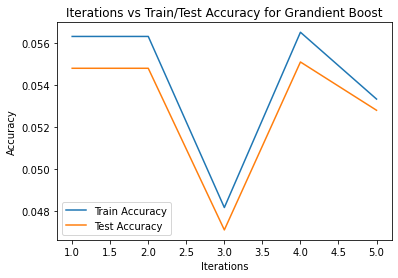

Final test accuracy = 0.0528


In [10]:
plt.plot(range(1,6),trainingAccuracy,label="Train Accuracy")
plt.plot(range(1,6),testAccuracy,label="Test Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Iterations vs Train/Test Accuracy for Grandient Boost")
plt.show()
print("Final test accuracy =",testAccuracy[-1])

In [11]:
with open('q1_model.pkl',"wb") as handle:
        pickle.dump(model,handle)

# Question 2

In [44]:
pip install torchvision==0.11.0

  Using cached torchvision-0.11.0-cp37-cp37m-win_amd64.whl (984 kB)


ERROR: Could not find a version that satisfies the requirement torch==1.10.0+cpu (from torchvision) (from versions: 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0)
ERROR: No matching distribution found for torch==1.10.0+cpu
You should consider upgrading via the 'c:\users\utkarsh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as functions
import tensorflow
import torchvision
from torchvision import datasets, transforms

In [106]:
# xTrain,yTrain=loadlocal_mnist(images_path='./fmnist/train-images-idx3-ubyte', labels_path='./fmnist/train-labels-idx1-ubyte')
# xTest,yTest = loadlocal_mnist(images_path='./fmnist/t10k-images-idx3-ubyte', labels_path='./fmnist/t10k-labels-idx1-ubyte')

transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=128)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128)



In [13]:
# print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [107]:
class NeuralNetwork(nn.Module):
    
    inputSize = None
    def __init__(self,inputSize,totalClasses):
        super(NeuralNetwork,self).__init__()
        self.inputSize = inputSize
        self.fc1 = nn.Linear(inputSize,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,64)
        self.fc4 = nn.Linear(64,totalClasses)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = functions.relu(x)
        x = self.fc2(x)
        x = functions.relu(x)
        x = self.fc3(x)
        x = functions.relu(x)
        x = self.fc4(x)
        return x

In [108]:
model = NeuralNetwork(inputSize=784,totalClasses=10)
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [109]:
criterion = nn.CrossEntropyLoss()
epochs = 10
learningRate = 0.05
batchSize = 128
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

lossToPlot = []

model.train()
# xTrain = torch.Tensor(xTrain, requires_grad=True)
# yTrain = torch.Tensor(yTrain, requires_grad=True)
for epoch in range(epochs):
    for data in train_loader:
        
#         print("working")
#         print(xTrain[i])
#         print(torch.tensor(xTrain[i]))
        image,label = data
        image = image.reshape(-1,28*28)
        outputs = model(image)
        loss = criterion(outputs,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    lossToPlot.append(loss.item())
    
    print("loss = ",loss.item())


loss =  0.5517042875289917
loss =  0.46172332763671875
loss =  0.4175527095794678
loss =  0.37563011050224304
loss =  0.34378114342689514
loss =  0.31917604804039
loss =  0.30047503113746643
loss =  0.2879427373409271
loss =  0.27492913603782654
loss =  0.26402607560157776


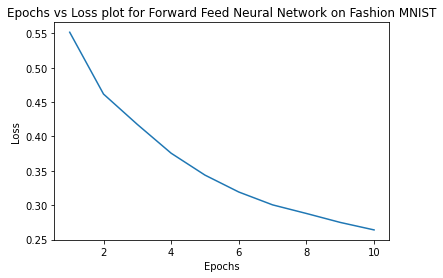

In [110]:
plt.plot(range(1,epochs+1),lossToPlot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss plot for Forward Feed Neural Network on Fashion MNIST")
plt.show()

In [111]:
yTrue = []
yPred = []

model.eval()
with torch.no_grad():
    
    for data in test_loader:
        image, label = data
        image = image.reshape(-1,28*28)
        output = model(image)
        
        _, prediction = torch.max(output.data, dim=1)
        
        yTrue += label.cpu()
        yPred += prediction.cpu()

In [112]:
print("Test Accuracy:",accuracy_score(yTrue, yPred))

Test Accuracy: 0.8713


In [113]:
matrix = confusion_matrix(yTrue, yPred)
classAcc = matrix.diagonal()/matrix.sum(axis=1)
print("Class Wise Accuracy:")
for i in range(len(classAcc)):
    print("class",str(i+1),":",classAcc[i])

Class Wise Accuracy:
class 1 : 0.86
class 2 : 0.967
class 3 : 0.722
class 4 : 0.902
class 5 : 0.826
class 6 : 0.979
class 7 : 0.614
class 8 : 0.936
class 9 : 0.975
class 10 : 0.932


In [114]:
with open('q2_model.pkl',"wb") as handle:
        pickle.dump(model,handle)

# Question 3

In [82]:
from sklearn.metrics import confusion_matrix

In [59]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=128)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [68]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU())    
        self.decoder = nn.Sequential(
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,512),
            nn.ReLU(),
            nn.Linear(512,784),
            nn.ReLU())
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [69]:
model = AutoEncoder()
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): ReLU()
  )
)


In [70]:
criterion = nn.MSELoss()
epochs = 10
learningRate = 0.001
batchSize = 128
optimizer = torch.optim.Adam(model.parameters(),lr=learningRate)

lossToPlot = []

model.train()
# xTrain = torch.Tensor(xTrain, requires_grad=True)
# yTrain = torch.Tensor(yTrain, requires_grad=True)
for epoch in range(epochs):
    for data in train_loader:
        
#         print("working")
#         print(xTrain[i])
#         print(torch.tensor(xTrain[i]))
        image,label = data
        image = image.reshape(-1,28*28)
        outputs = model(image)
        loss = criterion(outputs,image)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    lossToPlot.append(loss.item())
    
    print("loss = ",loss.item())


loss =  0.03175076097249985
loss =  0.02443133480846882
loss =  0.02115972712635994
loss =  0.019614754244685173
loss =  0.017588496208190918
loss =  0.016687341034412384
loss =  0.01620674692094326
loss =  0.015535562299191952
loss =  0.015242397785186768
loss =  0.01483254972845316


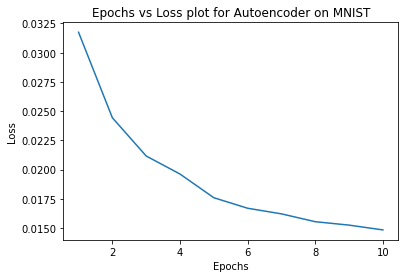

In [71]:
plt.plot(range(1,epochs+1),lossToPlot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss plot for Autoencoder on MNIST")
plt.show()

In [72]:
with open('q3_autoencoder_model.pkl',"wb") as handle:
        pickle.dump(model,handle)

In [73]:
class MNISTClassificationModel(nn.Module):
    
    def __init__(self,AutoEncoderModel):
        super(MNISTClassificationModel,self).__init__()
        
        self.model = nn.Sequential(
            AutoEncoderModel.encoder,
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10))
    
    def forward(self, x):
        return self.model(x)

In [76]:
classificationModel = MNISTClassificationModel(model)
print(classificationModel)

MNISTClassificationModel(
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=128, bias=True)
      (5): ReLU()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): ReLU()
    )
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [78]:
criterion = nn.CrossEntropyLoss()
epochs = 15
learningRate = 0.001
batchSize = 128
optimizer = torch.optim.Adam(classificationModel.parameters(),lr=learningRate)

lossToPlot = []

classificationModel.train()
# xTrain = torch.Tensor(xTrain, requires_grad=True)
# yTrain = torch.Tensor(yTrain, requires_grad=True)
for epoch in range(epochs):
    for data in train_loader:
        
#         print("working")
#         print(xTrain[i])
#         print(torch.tensor(xTrain[i]))
        image,label = data
        image = image.reshape(-1,28*28)
        outputs = classificationModel(image)
        loss = criterion(outputs,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    lossToPlot.append(loss.item())
    
    print("loss = ",loss.item())

loss =  0.22920309007167816
loss =  0.22367125749588013
loss =  0.16556724905967712
loss =  0.14786189794540405
loss =  0.11837640404701233
loss =  0.0979129746556282
loss =  0.07362712174654007
loss =  0.07006869465112686
loss =  0.07602279633283615
loss =  0.05916726589202881
loss =  0.07520507276058197
loss =  0.0812196210026741
loss =  0.049476366490125656
loss =  0.04729672893881798
loss =  0.038793813437223434


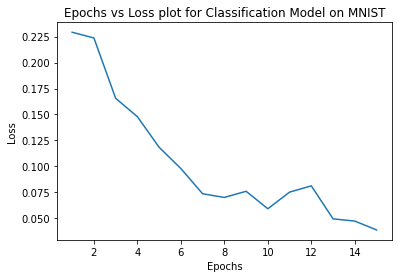

In [79]:
plt.plot(range(1,epochs+1),lossToPlot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss plot for Classification Model on MNIST")
plt.show()

In [80]:
yTrue = []
yPred = []

classificationModel.eval()
with torch.no_grad():
    
    for data in test_loader:
        image, label = data
        image = image.reshape(-1,28*28)
        output = classificationModel(image)
        _, prediction = torch.max(output.data, dim=1)
        
        yTrue += label.cpu()
        yPred += prediction.cpu()

In [83]:
matrix = confusion_matrix(yTrue, yPred)
classAcc = matrix.diagonal()/matrix.sum(axis=1)
print("Test Accuracy:",accuracy_score(yTrue, yPred))
print("Class Wise Accuracy:")
for i in range(len(classAcc)):
    print("class",str(i+1),":",classAcc[i])

Test Accuracy: 0.9829
Class-Wise Accuracy:
class 1 : 0.9908163265306122
class 2 : 0.9876651982378855
class 3 : 0.9874031007751938
class 4 : 0.9861386138613861
class 5 : 0.9796334012219959
class 6 : 0.9876681614349776
class 7 : 0.9770354906054279
class 8 : 0.9863813229571985
class 9 : 0.9691991786447639
class 10 : 0.9762140733399405


In [84]:
with open('q3_classificationMNIST_model.pkl',"wb") as handle:
        pickle.dump(classificationModel,handle)

# Question 4

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
xTrain,yTrain=loadlocal_mnist(images_path='./mnist/train-images.idx3-ubyte', labels_path='./mnist/train-labels.idx1-ubyte')
xTest,yTest = loadlocal_mnist(images_path='./mnist/t10k-images.idx3-ubyte', labels_path='./mnist/t10k-labels.idx1-ubyte')
print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [100]:
class BaggingModel:
    models = []
    bagSize = None
    
    def __init__(self,bagSize):
        self.bagSize = bagSize
    
    def fit(self,xTrain,yTrain):
        
        for bag in range(self.bagSize):
            pick = np.random.choice(np.arange(xTrain.shape[0]), size = xTrain.shape[0], replace = True)         
            chosenX = xTrain[pick]
            chosenY = yTrain[pick]
            model = DecisionTreeClassifier()
            model.fit(chosenX,chosenY)
            self.models.append(model)
    
    def predict(self, x):
        
        predictions = np.zeros((len(self.models),len(x)))
        for i in range(len(self.models)):
            predictions[i] = self.models[i].predict(x)
        yPred = []
        for i in range(predictions.shape[1]):
            prediction = np.bincount(np.array(predictions[:,i],dtype=np.int64)).argmax()
            yPred.append(prediction)
        
        return yPred
        

In [101]:
model = BaggingModel(3)

In [102]:
model.fit(xTrain,yTrain)

In [103]:
yPred = model.predict(xTest)

In [104]:
matrix = confusion_matrix(yTest, yPred)
classAcc = matrix.diagonal()/matrix.sum(axis=1)
print("Test Accuracy:",accuracy_score(yTest, yPred))
print("Class Wise Accuracy:")
for i in range(len(classAcc)):
    print("class",str(i+1),":",classAcc[i])

Test Accuracy: 0.9008
Class-Wise Accuracy:
class 1 : 0.9704081632653061
class 2 : 0.9779735682819384
class 3 : 0.8914728682170543
class 4 : 0.8891089108910891
class 5 : 0.9124236252545825
class 6 : 0.8632286995515696
class 7 : 0.8966597077244259
class 8 : 0.9105058365758755
class 9 : 0.8162217659137577
class 10 : 0.865213082259663


In [105]:
with open('q4_model.pkl',"wb") as handle:
        pickle.dump(model,handle)

In [120]:
with open('q1_model.pkl',"rb") as handle:
        model1 = pickle.load(handle)

In [121]:
print(model1.models)

[DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=1)]


In [123]:
yPred = model1.predictions(xTest)

In [ ]:
print("Accurancy =",accuracy_score(yTest, yPred))